<a href="https://colab.research.google.com/github/sriharikrishna/siamcse21/blob/main/rosenbrock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rosenbrock function
Also known as Rosenbrock's valley or Rosenbrock's banana function, the Rosenbrock function is a performace test for optimization. The narrow long valley makes it difficult to find the minimum. 

\begin{equation}
F(x) = \sum_{i=0}^{N-1}100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2.
\end{equation}


### 1. Primal Function
1. Evaluates the Rosenbrock function for an arbitary input vector.

In [95]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x):
    """
    Input: x vector of values
    Output: Result of Rosenbrock's banana function
    """
    result = jnp.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0,axis=0)
    return result

def plot_vals(vals, grad=None):
    plt.plot(vals,label='primal input')
    if grad != None:
      plt.plot(grad,label='derivatives')
    plt.xlabel('array index')
    plt.legend()
    plt.title('')
    plt.show()

### 2. Primal Driver
1. Calls the Rosenbrock function. 
2. We have arbitarily created an array `[0.5, 0.5..., 0.5]` as its input.

In [96]:
def fun_driver(n):
    """
    Input: n array length
    Output: Result of Rosenbrock's banana function
    """
    val = jnp.full(n, 0.5) 

    #compute the result
    result = rosenbrock(val)
    
    print("The input is", val)
    print("The result of Rosenbrock's is ", result)

In [97]:
fun_driver(10)

The input is [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
The result of Rosenbrock's is  58.5


### 3. First look at derivatives: `jax.grad()`
1. https://jax.readthedocs.io/en/latest/jax.html#jax.grad
2. Computes $J\cdot v$ for a function that computes a scalar value ($R^n \rightarrow R$).
3. The seed is internally set to `1.0`
   (the shape of the seed must match the primal output).   

In [98]:
#Create a function that computes the derivatives.
#This needs to happen only once.
grad_rosenbrock = jax.grad(rosenbrock)

def grad_driver(n):
    """
    Input: n array length
    Output: Result of Rosenbrock's banana function
    """
    #create the input array
    val = jnp.full(n, 0.5) 
    
    #compute the derivatives
    result = grad_rosenbrock(val)

    plot_vals(val,grad=result)
    print("The input is", val)
    print("The grad result is ", result)

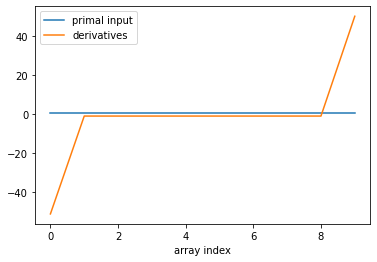

The input is [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
The grad result is  [-51.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  50.]


In [99]:
grad_driver(10)

### 4. Forward mode using: `jax.jacjvp()`
1. https://jax.readthedocs.io/en/latest/jax.html#jax.jvp
2. Computes $J\cdot v$ for a function $R^n \rightarrow R^m$. 
3. `jax.jacjvp()` requires the input value for the primal function, which is the point where the derivatives are computed.
4. `jax.jacjvp()` requires a seed $v$. 
   (For forward mode the shape of the seed must match the primal input.) 
5. The code below obtains the entire Jacobian by calling `jax.jacjvp()` multiple times. It sets the input value to an arbitary value and sets the seed to the Cartesian basis vectors.

In [100]:
def jvp_driver(n):
    """
    Input: n array length
    Output: Result of Rosenbrock's banana function
    """
    #create the input array
    val = jnp.full(n, 0.5) 

    tangents = jnp.empty([0])

    #compute the derivatives. It takes n calls!
    iden_seed = jnp.eye(n)   
    for i in range(n):
        # jax.jvp must be called once for each input and seed value
        primal_output, res = jax.jvp(rosenbrock, (val,), (iden_seed[i],))
        tangents = jnp.append(tangents, res)
    
    plot_vals(val,grad=tangents)
    print("The input is", val)
    print("The jax.jvp result is ", tangents)

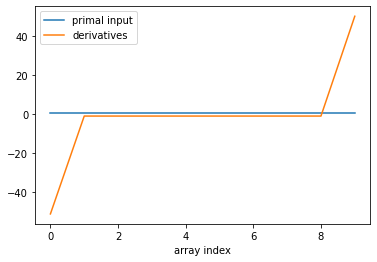

The input is [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
The jax.jvp result is  [-51.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  50.]


In [101]:
jvp_driver(10)

### 5. Reverse mode using: `jax.jacvjp()`
1. https://jax.readthedocs.io/en/latest/jax.html#jax.vjp
2. Uses reverse mode, returns a function (`fun_vjp` below) that computes $v \cdot J$ for a function $R^n \rightarrow R^m$.
3. `jax.jacvjp()` requires the input value for the primal function, which is the point where the derivatives are computed.
4. `fun_vjp` requires a seed $v$. For reverse mode the shape of the seed must match the primal output. We have chosen `1.0`. 
5. Exercise: See how values change as the seed changes.

In [102]:
def vjp_driver(n):    
    """
    Input: n array length
    Output: Result of Rosenbrock's banana function
    """
    #create the input array
    val = jnp.full(n, 0.5) 

    #jax.vjp must be called once for each input value
    primals, fun_vjp = jax.vjp(rosenbrock, val)
    
    #compute the derivatives by calling fun_vjp() for the seed value
    seed = 1.0
    adj_val = fun_vjp(seed)

    plot_vals(val,grad=jnp.stack(adj_val[0]))
    print("The input is", val)
    print("The jax.vjp result is ", adj_val[0])

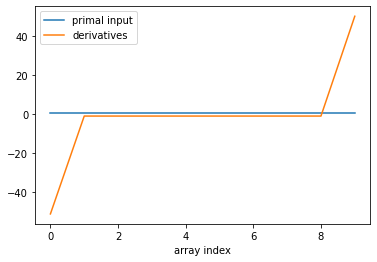

The input is [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
The jax.vjp result is  [-51.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  50.]


In [103]:
vjp_driver(10)